In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

In [ ]:
# 데이터 준비
from sklearn.datasets import load_breast_cancer

breast_cancer_dataset = load_breast_cancer()
print( breast_cancer_dataset['DESCR'] )

In [5]:
X = breast_cancer_dataset['data']
y = breast_cancer_dataset['target']
y_labels = breast_cancer_dataset['target_names']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [ ]:
# 모델 훈련 1
from sklearn.linear_model import LogisticRegression

# logreg = LogisticRegression()
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(0.9577464788732394, 0.958041958041958)

In [10]:
# 모델 훈련 2
from sklearn.linear_model import LogisticRegression

scores = []
for c in [0.01, 0.1, 1, 10, 100, 1000, 10000]:
    logreg = LogisticRegression(penalty="l2", C=c, max_iter=100000)
    logreg.fit(X_train, y_train)
    tr_score = logreg.score(X_train, y_train)
    te_score = logreg.score(X_test, y_test)
    scores.append( (c, tr_score, te_score) )

In [11]:
scores

[(0.01, 0.9530516431924883, 0.951048951048951),
 (0.1, 0.9507042253521126, 0.951048951048951),
 (1, 0.9577464788732394, 0.958041958041958),
 (10, 0.9741784037558685, 0.965034965034965),
 (100, 0.9788732394366197, 0.965034965034965),
 (1000, 0.9859154929577465, 0.9790209790209791),
 (10000, 0.9859154929577465, 0.972027972027972)]

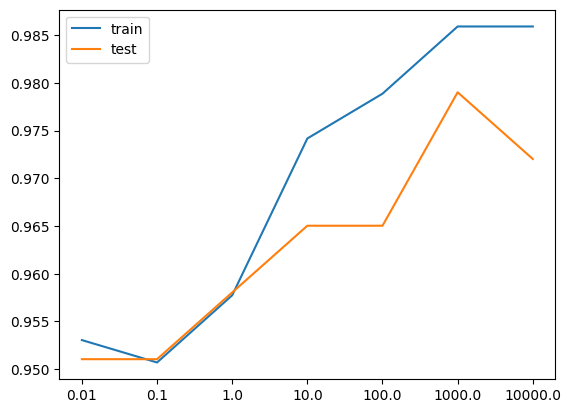

In [14]:
scores_df = pd.DataFrame(scores, columns=['c', 'train', 'test'])
scores_df

plt.plot(scores_df['c'].astype('str'), scores_df['train'], label='train')
plt.plot(scores_df['c'].astype('str'), scores_df['test'], label='test')
plt.legend()
plt.show()

In [15]:
# 최종 모델 학습 (전체 데이터로 학습)

final_logreg = LogisticRegression(penalty="l2", C=1000, max_iter=100000)
final_logreg.fit(X, y)
final_logreg.score(X, y)

0.9859402460456942

In [23]:
# 다중 분류 데이터 준비
from sklearn.datasets import make_blobs # 분류 데이터를 만드는 함수

X, y = make_blobs(n_samples=1000, n_features=2, centers=3, random_state=42)
print(X.shape, y.shape, np.unique(y, return_counts=True))

(1000, 2) (1000,) (array([0, 1, 2]), array([334, 333, 333]))


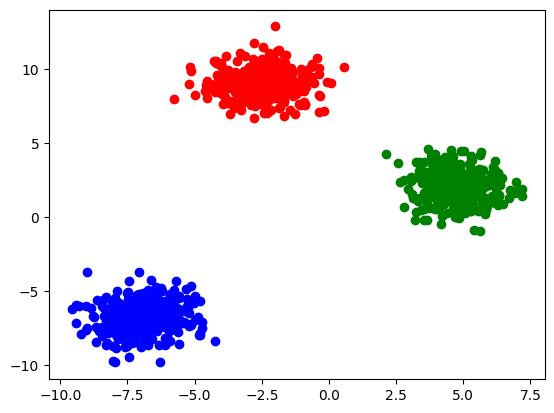

In [24]:
# 데이터 확인
plt.scatter(X[y==0, 0], X[y==0, 1], c='red')
plt.scatter(X[y==1, 0], X[y==1, 1], c='green')
plt.scatter(X[y==2, 0], X[y==2, 1], c='blue')
plt.show()

In [25]:
logreg2 = LogisticRegression()
logreg2.fit(X, y)

logreg2.score(X, y)

1.0